## Comment Category Prediction

#### Life cycle of this Machine Learning Project

- Understanding the problem statement  
- Data collection and understanding  
- Data checks and exploratory data analysis  
- Feature engineering and preprocessing  
- Model training and evaluation  
- Selecting and saving the best model  

### 1) Problem statement

The goal of this project is to automatically predict the **handling category** of a user comment posted on an online discussion platform.  
Given the raw comment text along with metadata such as creation time, reactions (upvotes and downvotes), emoticon indicators, and identity-related flags (race, religion, gender, disability), we want to classify each comment into one of four internal categories stored in the `label` column.

### 2) Data description

The training data (`train.csv`) contains all feature columns plus the target variable `label`, and the test data (`test.csv`) contains the same features but no labels.  
Each row represents a single comment with the following main fields:

- `comment`: raw text content of the comment.  
- `created_date`: timestamp when the comment was posted.  
- `post_id`: identifier of the parent discussion or post.  
- `emoticon_1`, `emoticon_2`, `emoticon_3`: indicators for three internal emoticon groups.  
- `upvote`, `downvote`: counts of positive and negative reactions.  
- `if_1`, `if_2`: hidden internal numerical features from the platform.  
- `race`, `religion`, `gender`, `disability`: indicators for detected references to specific identity-related topics.  
- `label`: target class showing how the platform finally handled the comment (4 possible values).


### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head()


,created_date,post_id,emoticon_1,emoticon_2,emoticon_3,upvote,downvote,if_1,if_2,race,religion,gender,disability,comment,label
0,2024-01-18 08:43:57.397508+00:00,73,0,0,0,0,1,0,10,NaN,NaN,NaN,False,She might be a bright spot for a party keou on...,2
1,2024-03-24 21:43:11.490017+00:00,39,0,0,0,6,0,0,4,NaN,NaN,NaN,False,"Under Alaska law, a non-tribal member is not b...",0
2,2024-04-24 20:32:17.014931+00:00,31,0,1,1,0,0,0,10,NaN,NaN,NaN,False,in the future please spare me your strawman dr...,2
3,2023-05-28 22:00:14.214527+00:00,39,0,0,0,5,0,0,10,NaN,NaN,NaN,False,"PS: That should have been ""rot"" instead of ""co...",2
4,2023-09-09 23:12:05.689498+00:00,39,0,0,0,0,0,0,10,NaN,NaN,NaN,False,"Today, the confederate flag...tomorrow, the na...",2


Basic info and stats

In [3]:
train.shape
train.info()
train.describe()
train.describe(include="object")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198000 entries, 0 to 197999
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   created_date  198000 non-null  object
 1   post_id       198000 non-null  int64 
 2   emoticon_1    198000 non-null  int64 
 3   emoticon_2    198000 non-null  int64 
 4   emoticon_3    198000 non-null  int64 
 5   upvote        198000 non-null  int64 
 6   downvote      198000 non-null  int64 
 7   if_1          198000 non-null  int64 
 8   if_2          198000 non-null  int64 
 9   race          52577 non-null   object
 10  religion      52577 non-null   object
 11  gender        52577 non-null   object
 12  disability    198000 non-null  bool  
 13  comment       197999 non-null  object
 14  label         198000 non-null  int64 
dtypes: bool(1), int64(9), object(5)
memory usage: 21.3+ MB


,created_date,race,religion,gender,comment
count,198000,52577,52577,52577,197999
unique,197996,6,8,5,197842
top,2022-05-06 20:47:06.726636+00:00,none,none,none,Troll
freq,2,39682,38249,36161,8


Target analysis (label)


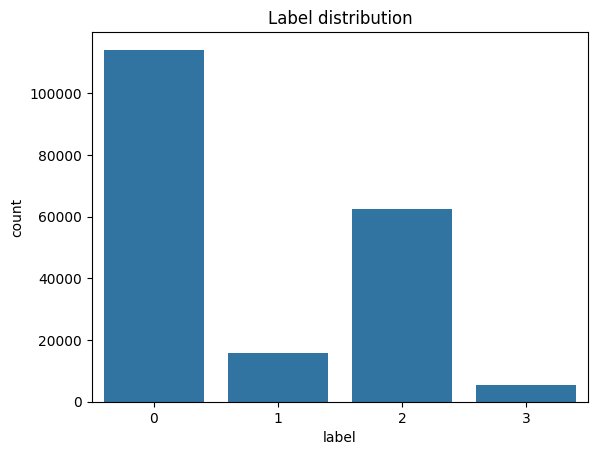

In [4]:
train["label"].value_counts()
train["label"].value_counts(normalize=True)
sns.countplot(data=train, x="label")
plt.title("Label distribution")
plt.show()


Text-derived features


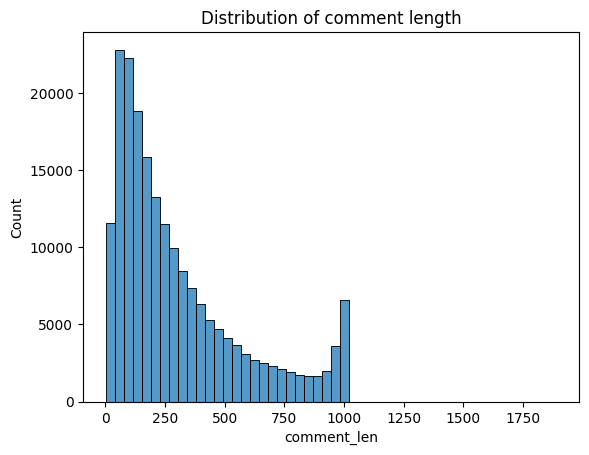

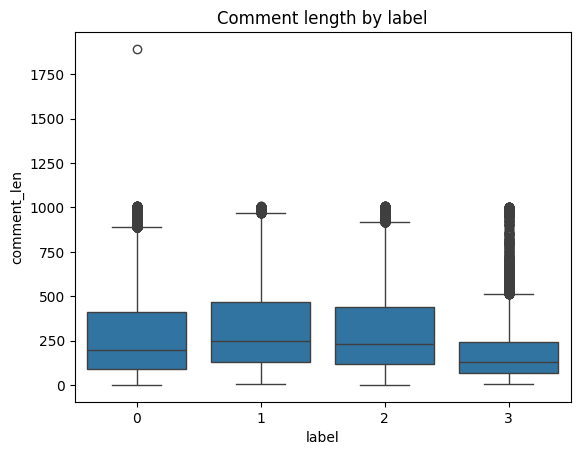

In [5]:
train["comment_len"] = train["comment"].astype(str).str.len()
train["word_count"] = train["comment"].astype(str).str.split().map(len)

train[["comment_len", "word_count"]].describe()

sns.histplot(train["comment_len"], bins=50)
plt.title("Distribution of comment length")
plt.show()

sns.boxplot(data=train, x="label", y="comment_len")
plt.title("Comment length by label")
plt.show()


Date/time features


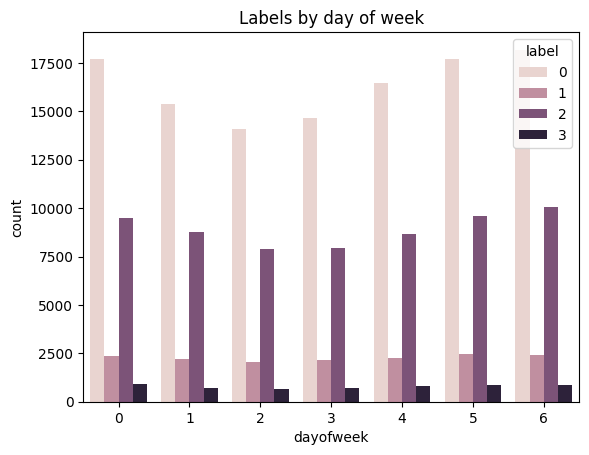

In [6]:
train["created_date"] = pd.to_datetime(train["created_date"])
train["hour"] = train["created_date"].dt.hour
train["dayofweek"] = train["created_date"].dt.dayofweek

sns.countplot(data=train, x="dayofweek", hue="label")
plt.title("Labels by day of week")
plt.show()


Numeric features (upvote, downvote, if_1, if_2)


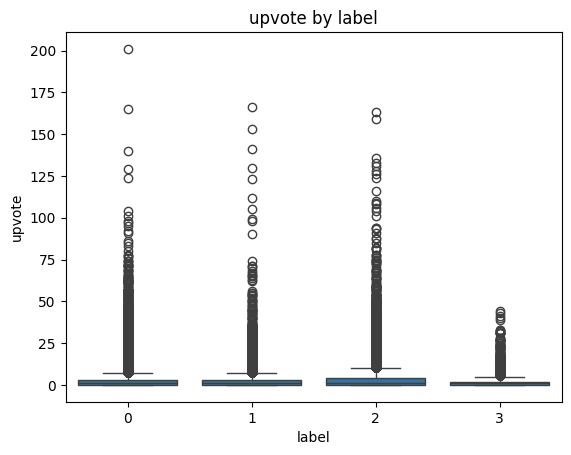

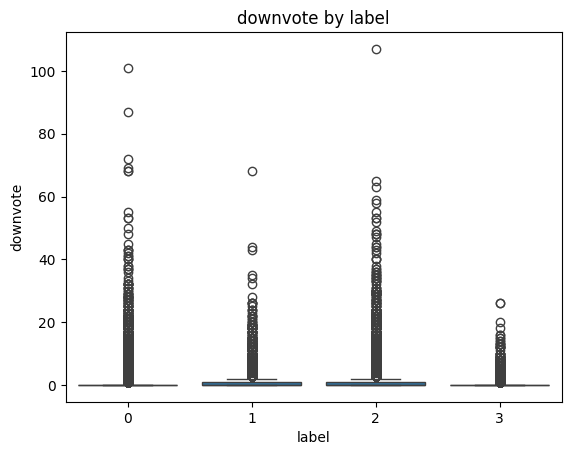

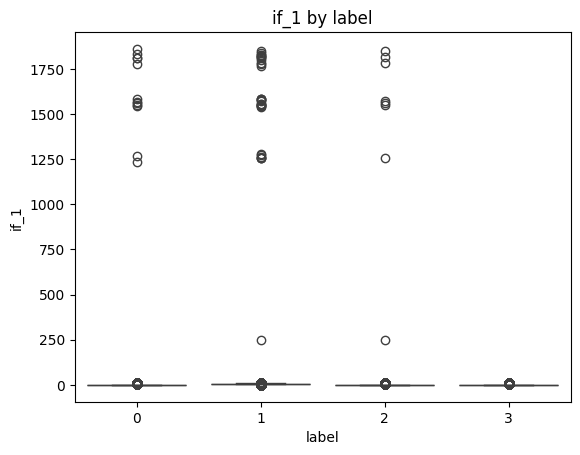

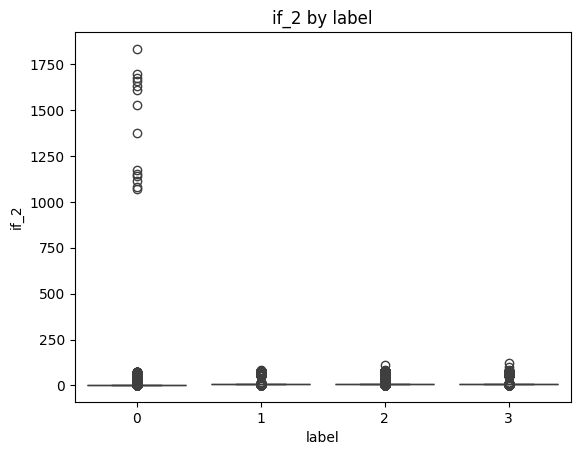

In [7]:
num_cols = ["upvote", "downvote", "if_1", "if_2"]
train[num_cols].describe()

for col in num_cols:
    sns.boxplot(data=train, x="label", y=col)
    plt.title(f"{col} by label")
    plt.show()


Indicator features and counts

emoticon_1
emoticon_1
0     169078
1      17683
2       5799
3       2362
4       1243
5        638
6        374
7        225
8        162
9        102
10        69
11        68
12        40
13        27
15        20
16        20
14        19
19        13
17         9
23         7
22         6
20         5
18         5
25         4
36         4
27         3
21         2
24         2
30         2
32         2
31         2
28         1
33         1
46         1
47         1
39         1
Name: count, dtype: int64 



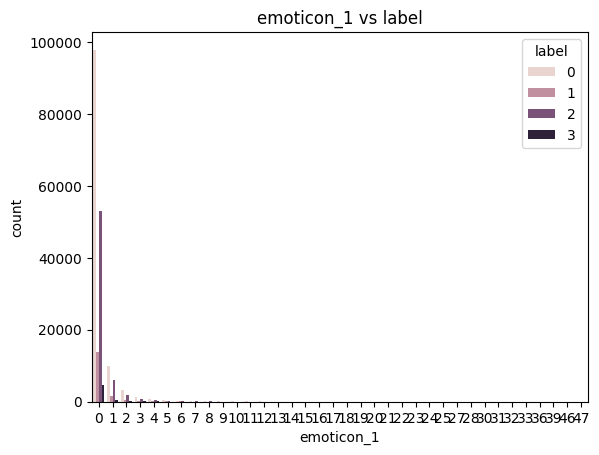

emoticon_2
emoticon_2
0     189891
1       7031
2        822
3        177
4         48
5         21
6          7
8          1
11         1
7          1
Name: count, dtype: int64 



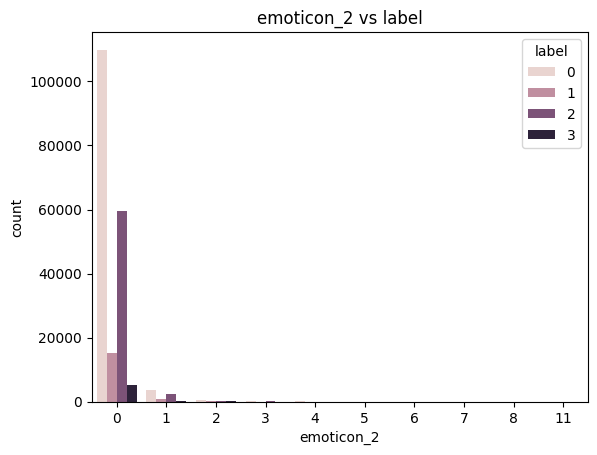

emoticon_3
emoticon_3
0     180835
1      13017
2       2777
3        764
4        309
5        132
6         79
7         41
8         14
10        12
9          9
11         4
14         2
13         2
12         2
17         1
Name: count, dtype: int64 



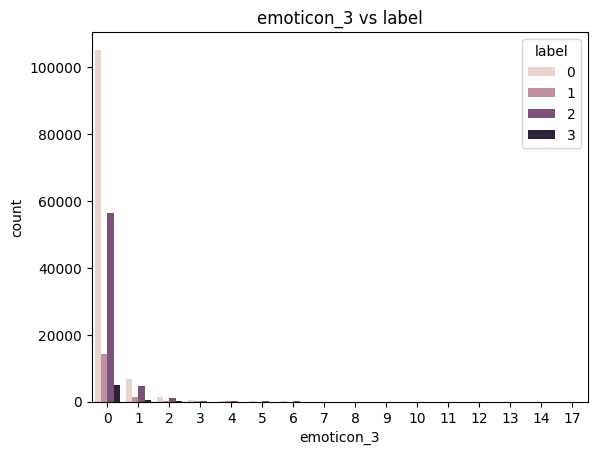

race
race
none      39682
white      5486
black      3869
other      1654
asian      1263
latino      623
Name: count, dtype: int64 



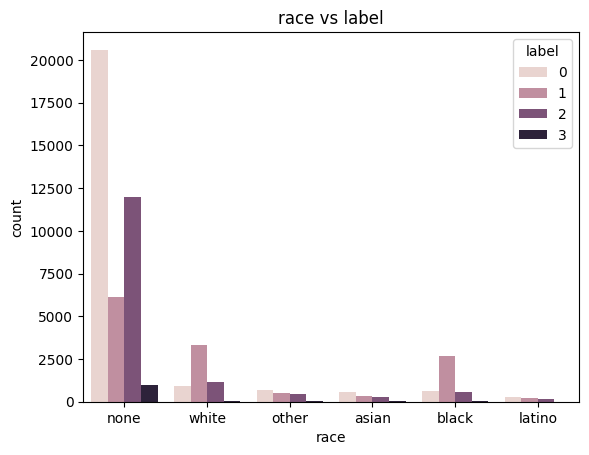

religion
religion
none         38249
christian     7191
muslim        4930
jewish        1244
other          547
atheist        219
buddhist       100
hindu           97
Name: count, dtype: int64 



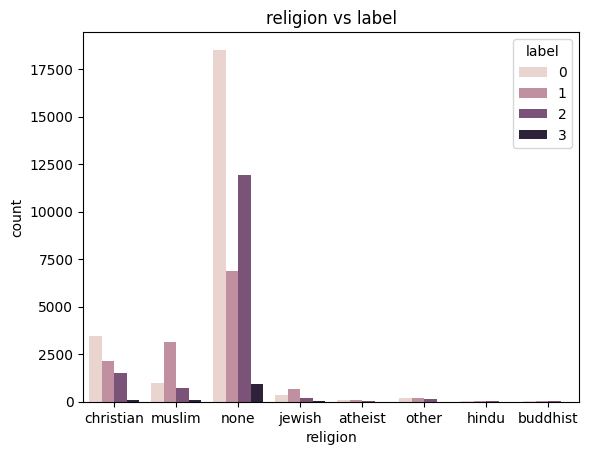

gender
gender
none           36161
female          8037
male            7549
transgender      622
other            208
Name: count, dtype: int64 



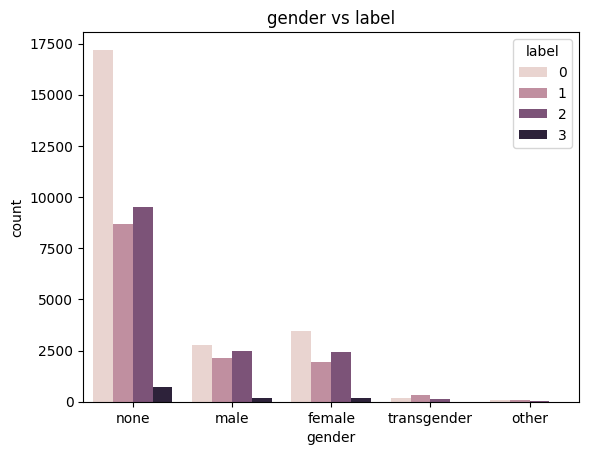

disability
disability
False    195257
True       2743
Name: count, dtype: int64 



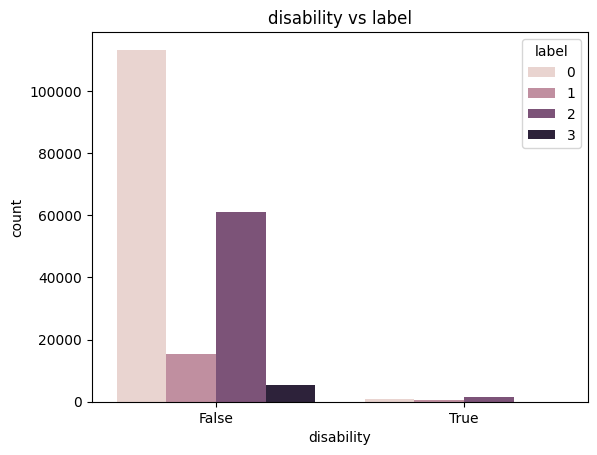

In [8]:
indicator_cols = [
    "emoticon_1", "emoticon_2", "emoticon_3",
    "race", "religion", "gender", "disability"
]

for col in indicator_cols:
    print(col)
    print(train[col].value_counts(), "\n")
    sns.countplot(data=train, x=col, hue="label")
    plt.title(f"{col} vs label")
    plt.show()
